# Diabetes Dataset Analysis
### Mehmet Emin Titrek - 2018300231

## Importing necessary libraries

In [1]:
library(tidyverse)
library(rpart)
library(data.table)
library(ggplot2)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘data.table’


The following objects are masked from ‘package:lubridate’:

    hour, isoweek, mday, minute, month, quarter, second, wday, week,
    yday, year


The following objects are masked from ‘package:dplyr’:

    between, first, last


The following object is masked from ‘package:purrr’:

    transpose




## Importing dataset and preparing for analysis

In [2]:
url <- 'https://raw.githubusercontent.com/MeminT99/ad455/main/assignment-9/diabetes_dataset.csv'
raw_data <- fread(url)

head(raw_data)

Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<int>,<int>
6,148,72,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
8,183,64,0,0,23.3,0.672,32,1
1,89,66,23,94,28.1,0.167,21,0
0,137,40,35,168,43.1,2.288,33,1
5,116,74,0,0,25.6,0.201,30,0


In [3]:
str(raw_data)

Classes ‘data.table’ and 'data.frame':	768 obs. of  9 variables:
 $ Pregnancies             : int  6 1 8 1 0 5 3 10 2 8 ...
 $ Glucose                 : int  148 85 183 89 137 116 78 115 197 125 ...
 $ BloodPressure           : int  72 66 64 66 40 74 50 0 70 96 ...
 $ SkinThickness           : int  35 29 0 23 35 0 32 0 45 0 ...
 $ Insulin                 : int  0 0 0 94 168 0 88 0 543 0 ...
 $ BMI                     : num  33.6 26.6 23.3 28.1 43.1 25.6 31 35.3 30.5 0 ...
 $ DiabetesPedigreeFunction: num  0.627 0.351 0.672 0.167 2.288 ...
 $ Age                     : int  50 31 32 21 33 30 26 29 53 54 ...
 $ Outcome                 : int  1 0 1 0 1 0 1 0 1 1 ...
 - attr(*, ".internal.selfref")=<externalptr> 


In [4]:
missing_raw <- raw_data %>%
  summarise_all(~ sum(is.na(.) | . == ""))

missing_raw

Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
0,0,0,0,0,0,0,0,0


**Luckily we do not have any missing value in the data!!!**

In [5]:
## Apply function to calculate number of unique elements in each column
sapply(raw_data, function(x) length(unique(x)))

Pregnancies                  Glucose            BloodPressure 
                      17                      136                       47 
           SkinThickness                  Insulin                      BMI 
                      51                      186                      248 
DiabetesPedigreeFunction                      Age                  Outcome 
                     517                       52                        2

In [6]:
DT <- raw_data %>%
  select(-Pregnancies) %>%
  mutate(Outcome = factor(Outcome))

In [7]:
head(DT)

Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
<int>,<int>,<int>,<int>,<dbl>,<dbl>,<int>,<fct>
148,72,35,0,33.6,0.627,50,1
85,66,29,0,26.6,0.351,31,0
183,64,0,0,23.3,0.672,32,1
89,66,23,94,28.1,0.167,21,0
137,40,35,168,43.1,2.288,33,1
116,74,0,0,25.6,0.201,30,0


In [8]:
str(DT)

Classes ‘data.table’ and 'data.frame':	768 obs. of  8 variables:
 $ Glucose                 : int  148 85 183 89 137 116 78 115 197 125 ...
 $ BloodPressure           : int  72 66 64 66 40 74 50 0 70 96 ...
 $ SkinThickness           : int  35 29 0 23 35 0 32 0 45 0 ...
 $ Insulin                 : int  0 0 0 94 168 0 88 0 543 0 ...
 $ BMI                     : num  33.6 26.6 23.3 28.1 43.1 25.6 31 35.3 30.5 0 ...
 $ DiabetesPedigreeFunction: num  0.627 0.351 0.672 0.167 2.288 ...
 $ Age                     : int  50 31 32 21 33 30 26 29 53 54 ...
 $ Outcome                 : Factor w/ 2 levels "0","1": 2 1 2 1 2 1 2 1 2 2 ...
 - attr(*, ".internal.selfref")=<externalptr> 


---


**Glucose:** Glucose level in blood

**BloodPressure:** Blood pressure measurement

**SkinThickness:** Thickness of the skin

**Insulin:** Insulin level in blood

**BMI:** Body mass index

**DiabetesPedigreeFunction:** Diabetes percentage

**Age:** Age

**Outcome:** Final result 1 is Yes and 0 is No

---

## Descriptive analysis

In [9]:
summary(DT)

    Glucose      BloodPressure    SkinThickness      Insulin     
 Min.   :  0.0   Min.   :  0.00   Min.   : 0.00   Min.   :  0.0  
 1st Qu.: 99.0   1st Qu.: 62.00   1st Qu.: 0.00   1st Qu.:  0.0  
 Median :117.0   Median : 72.00   Median :23.00   Median : 30.5  
 Mean   :120.9   Mean   : 69.11   Mean   :20.54   Mean   : 79.8  
 3rd Qu.:140.2   3rd Qu.: 80.00   3rd Qu.:32.00   3rd Qu.:127.2  
 Max.   :199.0   Max.   :122.00   Max.   :99.00   Max.   :846.0  
      BMI        DiabetesPedigreeFunction      Age        Outcome
 Min.   : 0.00   Min.   :0.0780           Min.   :21.00   0:500  
 1st Qu.:27.30   1st Qu.:0.2437           1st Qu.:24.00   1:268  
 Median :32.00   Median :0.3725           Median :29.00          
 Mean   :31.99   Mean   :0.4719           Mean   :33.24          
 3rd Qu.:36.60   3rd Qu.:0.6262           3rd Qu.:41.00          
 Max.   :67.10   Max.   :2.4200           Max.   :81.00          

---
| Feature                  | Min.   | 1st Qu. | Median | Mean   | 3rd Qu. | Max.   |
|--------------------------|--------|---------|--------|--------|---------|--------|
| Pregnancies              | 0.000  | 1.000   | 3.000  | 3.845  | 6.000   | 17.000 |
| Glucose                  | 0.0    | 99.0    | 117.0  | 120.9  | 140.2   | 199.0  |
| BloodPressure            | 0.00   | 62.00   | 72.00  | 69.11  | 80.00   | 122.00 |
| SkinThickness            | 0.00   | 0.00    | 23.00  | 20.54  | 32.00   | 99.00  |
| Insulin                  | 0.0    | 0.0     | 30.5   | 79.8   | 127.2   | 846.0  |
| BMI                      | 0.00   | 27.30   | 32.00  | 31.99  | 36.60   | 67.10  |
| DiabetesPedigreeFunction | 0.0780 | 0.2437  | 0.3725 | 0.4719 | 0.6262  | 2.4200 |
| Age                      | 21.00  | 24.00   | 29.00  | 33.24  | 41.00   | 81.00  |

**Outcome:**
- 0 (Not having diabetes): 500
- 1 (Having diabetes): 268
---

### Glucose level in blood vs. Outcome

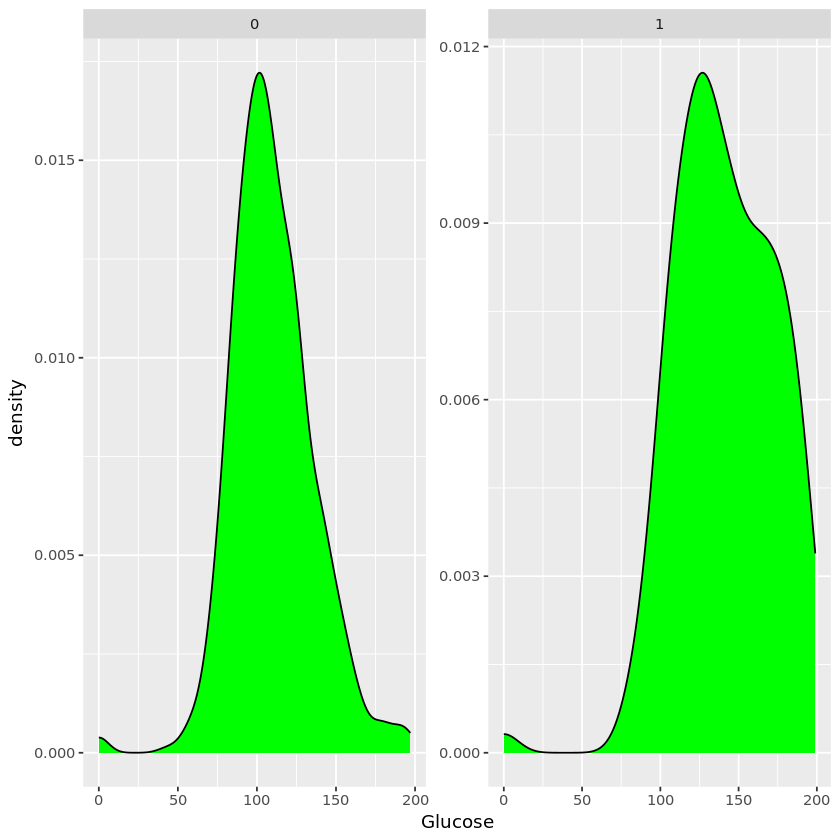

In [10]:
DT %>%
    ggplot(aes(Glucose))+
    facet_wrap(~Outcome, scale="free")+
    geom_density(fill="green")

### Blood pressure measurement vs. Outcome

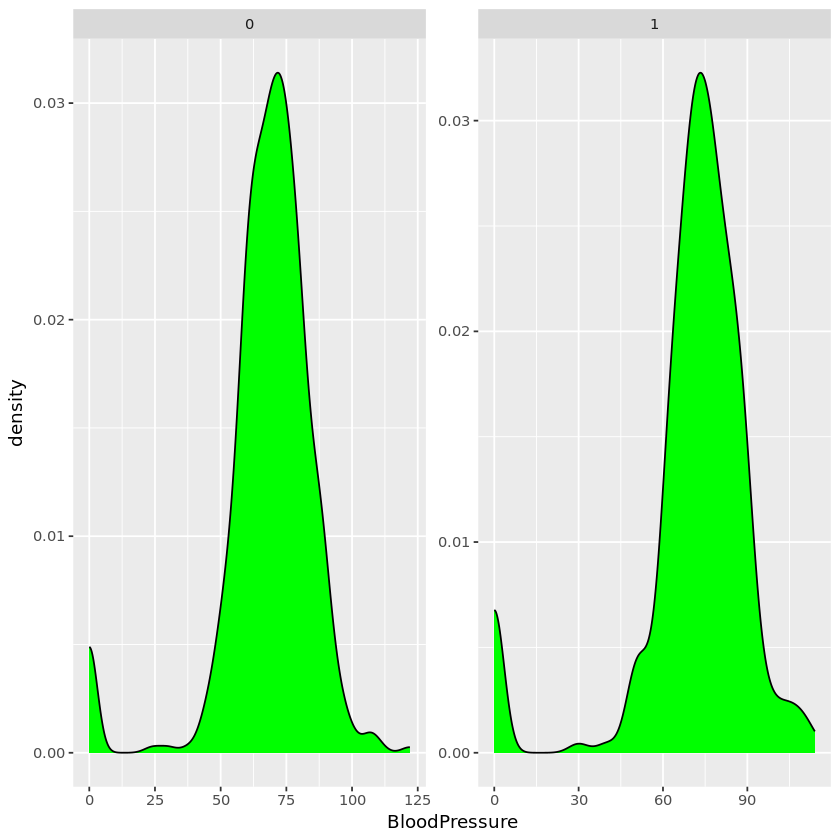

In [11]:
DT %>%
    ggplot(aes(BloodPressure))+
    facet_wrap(~Outcome, scale="free")+
    geom_density(fill="green")

### Thickness of the skin vs. Outcome

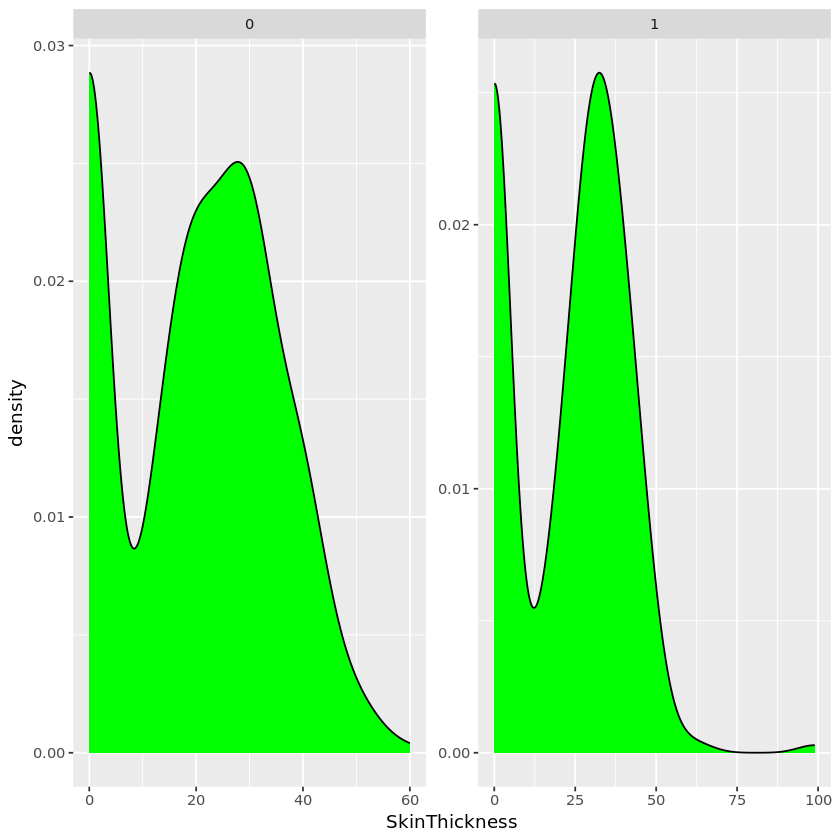

In [12]:
DT %>%
    ggplot(aes(SkinThickness))+
    facet_wrap(~Outcome, scale="free")+
    geom_density(fill="green")

### Insulin level in blood vs. Outcome

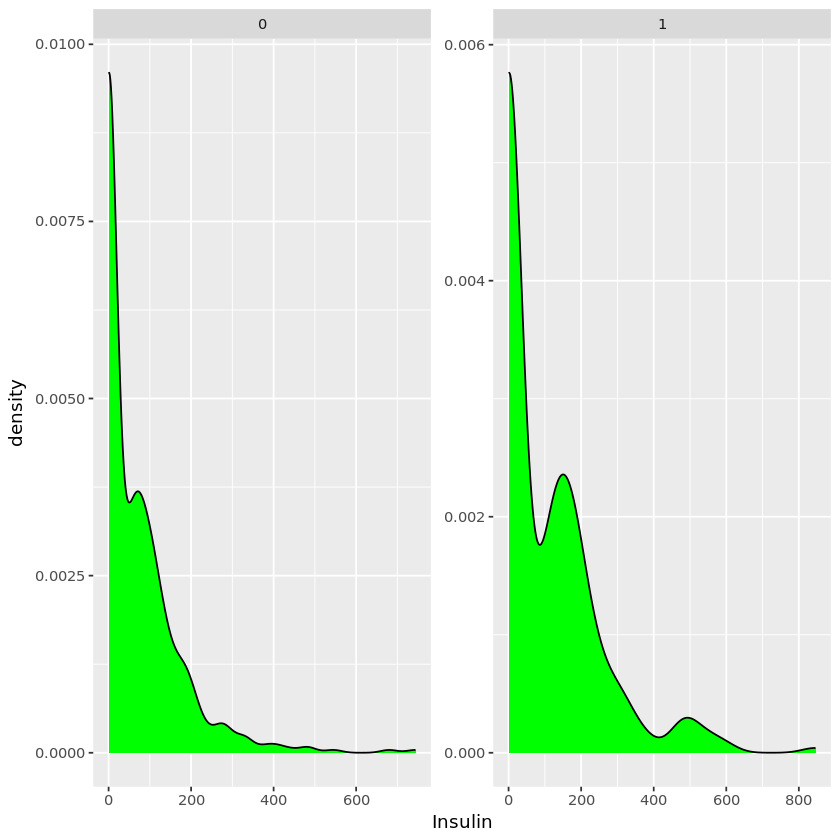

In [13]:
DT %>%
    ggplot(aes(Insulin))+
    facet_wrap(~Outcome, scale="free")+
    geom_density(fill="green")

### Body mass index vs. Outcome

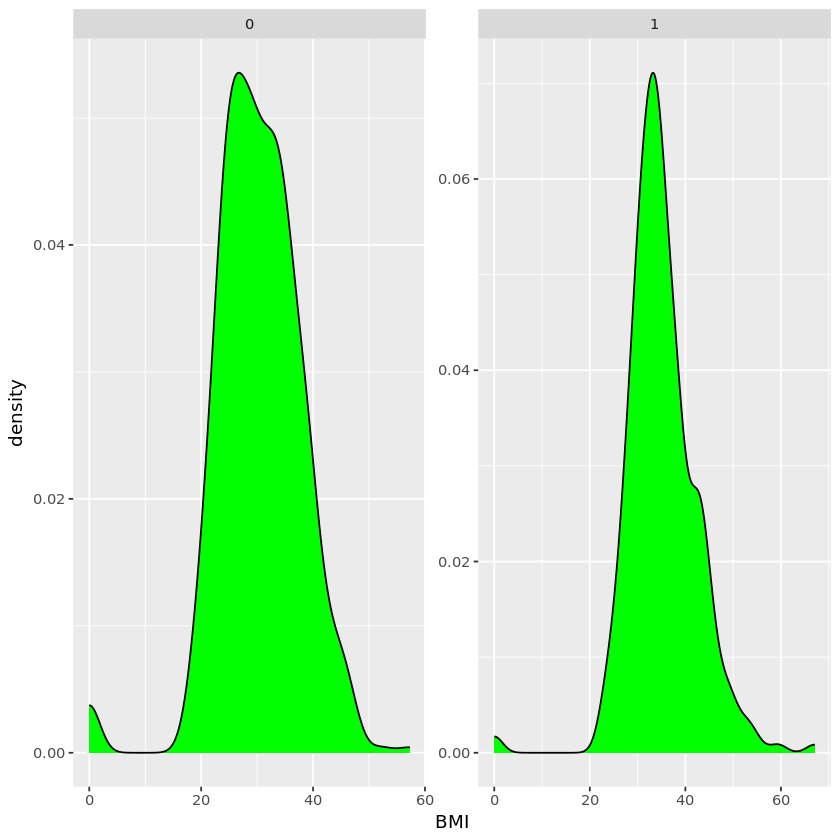

In [14]:
DT %>%
    ggplot(aes(BMI))+
    facet_wrap(~Outcome, scale="free")+
    geom_density(fill="green")

### Diabetes percentage vs. Outcome

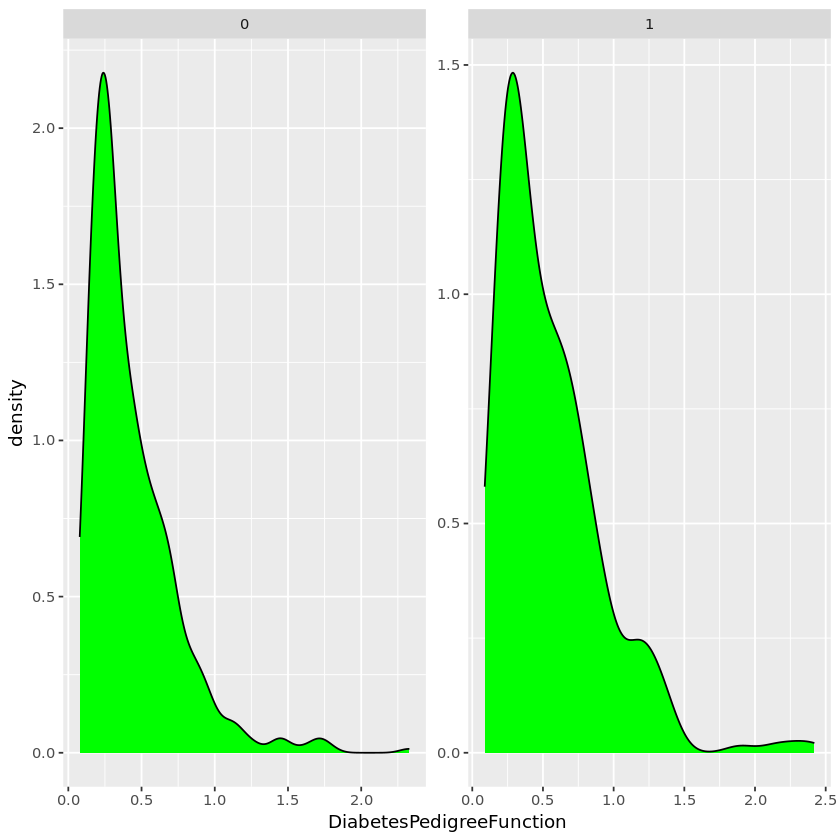

In [15]:
DT %>%
    ggplot(aes(DiabetesPedigreeFunction))+
    facet_wrap(~Outcome, scale="free")+
    geom_density(fill="green")

### Age vs. Outcome

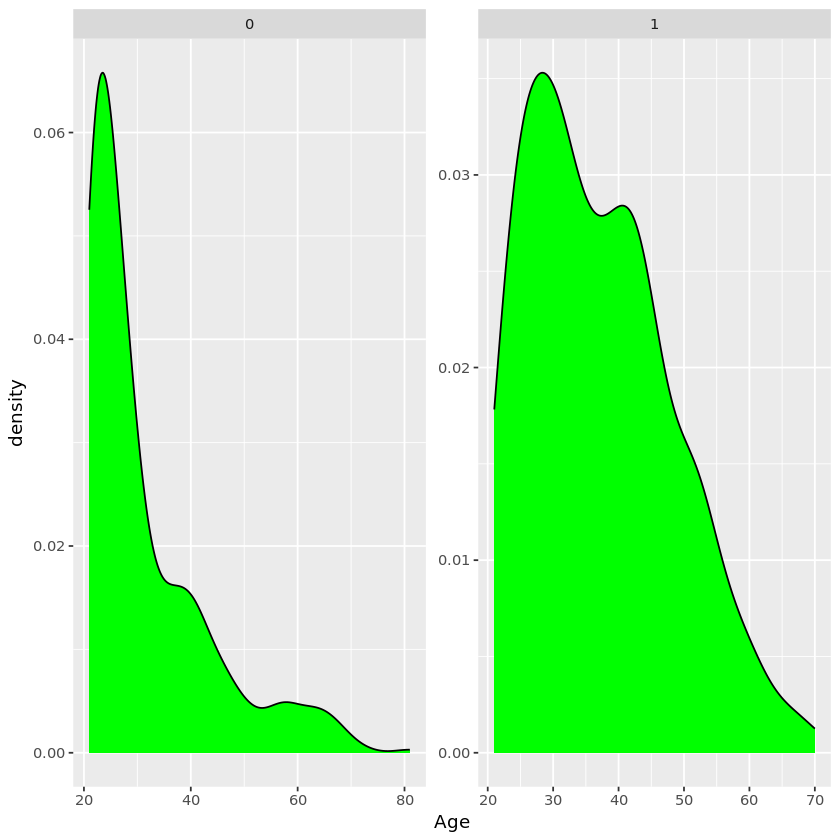

In [16]:
DT %>%
    ggplot(aes(Age))+
    facet_wrap(~Outcome, scale="free")+
    geom_density(fill="green")

### Correlation Matrix

In [17]:
DT_numeric <- DT[, lapply(.SD, as.numeric)]

# Exclude factor variables from the correlation calculation
numeric_vars <- DT_numeric[, sapply(.SD, is.numeric)]
cor_matrix <- round(cor(DT_numeric[, numeric_vars, with = FALSE]), digits=2)

cor_matrix

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Glucose,1.00,0.15,0.06,0.33,0.22,0.14,0.26,0.47
BloodPressure,0.15,1.00,0.21,0.09,0.28,0.04,0.24,0.07
SkinThickness,0.06,0.21,1.00,0.44,0.39,0.18,-0.11,0.07
Insulin,0.33,0.09,0.44,1.00,0.20,0.19,-0.04,0.13
BMI,0.22,0.28,0.39,0.20,1.00,0.14,0.04,0.29
DiabetesPedigreeFunction,0.14,0.04,0.18,0.19,0.14,1.00,0.03,0.17
Age,0.26,0.24,-0.11,-0.04,0.04,0.03,1.00,0.24
Outcome,0.47,0.07,0.07,0.13,0.29,0.17,0.24,1.00


---
Decision Tree Model
====================

**Target Variable (`Outcome`):**
  
This is the variable we are trying to predict. In the decision tree model, it represents the presence or absence of diabetes (0 for no diabetes, 1 for diabetes).

**Features:**
  
- **`Glucose`:** Glucose levels are a fundamental indicator of diabetes and have a strong correlation with the outcome. Higher glucose levels are associated with a higher likelihood of diabetes.
  
- **`BMI`:** Body Mass Index (BMI) is another significant predictor of diabetes. Higher BMI values are often associated with a higher risk of diabetes.
  
- **`Age`:** Age is a common risk factor for diabetes, as the prevalence of diabetes tends to increase with age.
  
- **`Insulin`:** Insulin levels are directly related to diabetes, as insulin resistance is a hallmark of the disease. Higher insulin levels may indicate diabetes.
  
- **`DiabetesPedigreeFunction`:** This function represents the hereditary risk of diabetes based on family history. Higher values suggest a greater genetic predisposition to diabetes.

---

### Partition dataset

In [18]:
set.seed(455)

train_rows <- round(0.7 * nrow(DT))
train_ind <- DT[, sample(.I, train_rows)]

train_data <- DT[train_ind]
test_data <- DT[!train_ind]

# Check the dimensions of the datasets
print(paste("Training data dimensions:", dim(train_data)))
print(paste("Testing data dimensions:", dim(test_data)))

[1] "Training data dimensions: 538" "Training data dimensions: 8"  
[1] "Testing data dimensions: 230" "Testing data dimensions: 8"  


### Train the dataset

In [19]:
diabetes.rp <- rpart::rpart(Outcome ~ Glucose + BMI + Age + Insulin + DiabetesPedigreeFunction, data = train_data)

In [20]:
diabetes.rp

n= 538 

node), split, n, loss, yval, (yprob)
      * denotes terminal node

  1) root 538 187 0 (0.6524164 0.3475836)  
    2) Glucose< 117.5 277  41 0 (0.8519856 0.1480144) *
    3) Glucose>=117.5 261 115 1 (0.4406130 0.5593870)  
      6) Glucose< 154.5 180  80 0 (0.5555556 0.4444444)  
       12) BMI< 26.75 29   4 0 (0.8620690 0.1379310) *
       13) BMI>=26.75 151  75 1 (0.4966887 0.5033113)  
         26) Age< 41.5 118  52 0 (0.5593220 0.4406780)  
           52) BMI< 41.65 97  37 0 (0.6185567 0.3814433)  
            104) DiabetesPedigreeFunction< 0.857 87  29 0 (0.6666667 0.3333333) *
            105) DiabetesPedigreeFunction>=0.857 10   2 1 (0.2000000 0.8000000) *
           53) BMI>=41.65 21   6 1 (0.2857143 0.7142857) *
         27) Age>=41.5 33   9 1 (0.2727273 0.7272727) *
      7) Glucose>=154.5 81  15 1 (0.1851852 0.8148148) *

In [21]:
printcp(diabetes.rp)


Classification tree:
rpart::rpart(formula = Outcome ~ Glucose + BMI + Age + Insulin + 
    DiabetesPedigreeFunction, data = train_data)

Variables actually used in tree construction:
[1] Age                      BMI                      DiabetesPedigreeFunction
[4] Glucose                 

Root node error: 187/538 = 0.34758

n= 538 

        CP nsplit rel error  xerror     xstd
1 0.165775      0   1.00000 1.00000 0.059067
2 0.106952      1   0.83422 0.92513 0.057934
3 0.040107      2   0.72727 0.91444 0.057756
4 0.032086      5   0.59893 0.76471 0.054794
5 0.010000      6   0.56684 0.75936 0.054671


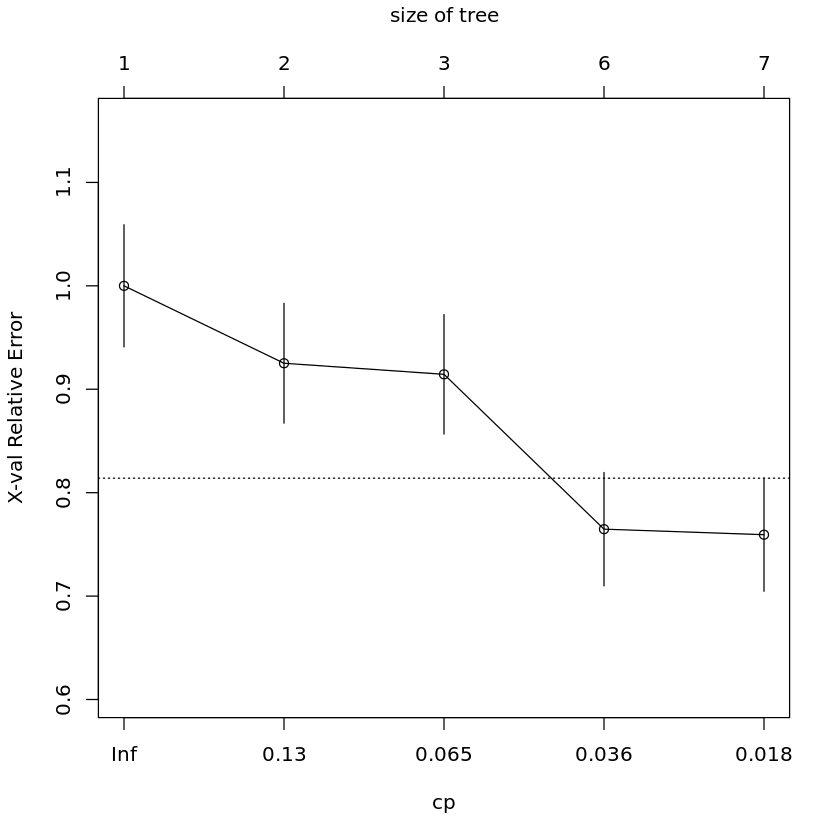

In [22]:
plotcp(diabetes.rp)

### Evaluate the classification accuracy

In [23]:
predictions_train <- predict(diabetes.rp, train_data, type = "class")

In [26]:
caret::confusionMatrix(table(fitted = predictions_train, actual = train_data$Outcome))

Confusion Matrix and Statistics

      actual
fitted   0   1
     0 319  74
     1  32 113
                                          
               Accuracy : 0.803           
                 95% CI : (0.7668, 0.8358)
    No Information Rate : 0.6524          
    P-Value [Acc > NIR] : 1.190e-14       
                                          
                  Kappa : 0.5415          
                                          
 Mcnemar's Test P-Value : 6.826e-05       
                                          
            Sensitivity : 0.9088          
            Specificity : 0.6043          
         Pos Pred Value : 0.8117          
         Neg Pred Value : 0.7793          
             Prevalence : 0.6524          
         Detection Rate : 0.5929          
   Detection Prevalence : 0.7305          
      Balanced Accuracy : 0.7566          
                                          
       'Positive' Class : 0               
                                          

**Accuracy rate is 80.3% with misclassified cases of 106 out of 538**

---

### Predictive power of the model

In [25]:
predictions_test <- predict(diabetes.rp, test_data, type = "class")

In [37]:
caret::confusionMatrix(table(predicted = predictions_test, actual = test_data$Outcome))

Confusion Matrix and Statistics

         actual
predicted   0   1
        0 126  29
        1  23  52
                                          
               Accuracy : 0.7739          
                 95% CI : (0.7143, 0.8263)
    No Information Rate : 0.6478          
    P-Value [Acc > NIR] : 2.392e-05       
                                          
                  Kappa : 0.496           
                                          
 Mcnemar's Test P-Value : 0.4881          
                                          
            Sensitivity : 0.8456          
            Specificity : 0.6420          
         Pos Pred Value : 0.8129          
         Neg Pred Value : 0.6933          
             Prevalence : 0.6478          
         Detection Rate : 0.5478          
   Detection Prevalence : 0.6739          
      Balanced Accuracy : 0.7438          
                                          
       'Positive' Class : 0               
                                     

**Accuracy rate is 77.4% with mispredicted cases of 52 out of 230. Which is not bad!**

---